In [2]:
# Import dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
# import tensorflow as tf
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
# Import the input dataset
tracks_path = 'Resources/pre_spotify_target_tracks.csv'
tracks_df = pd.read_csv(tracks_path)
tracks_df.head()

,track_popularity,duration_ms,explicit,key,time_signature,followers,artist_popularity,unique_playlists,danceability,energy,...,genres_classic bollywood,genres_classical era,genres_classical,genres_desi pop,genres_filmi,genres_hoerspiel,genres_sufi,genres_tango,genres_vintage tango,genres_other
0,1.0,0.045291,0.0,0.545455,0.8,0.000041,0.36,0.0,0.628658,0.599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.032864,0.0,0.181818,0.8,0.000230,0.48,0.0,0.629667,0.766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.040952,0.0,0.636364,0.8,0.000066,0.38,0.0,0.577195,0.608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.031660,0.0,0.181818,0.8,0.006968,0.73,0.0,0.258325,0.895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.041927,0.0,0.363636,0.6,0.000201,0.44,0.0,0.624622,0.518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
# Remove track_popularity target from features data
y = tracks_df.track_popularity
X = tracks_df.drop(columns=["track_popularity"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

## Model 1: Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

# Train model
model1 = LogisticRegression(solver="lbfgs",max_iter=1000)

# Fit model
model1 = model1.fit(X_train, y_train)

# Predict probability
pred_prob1 = model1.predict_proba(X_test)
prediction1 = model1.predict(X_test)

In [6]:
print(pred_prob1)

[[0.88511435 0.11488565]
 [0.98001873 0.01998127]
 [0.60563888 0.39436112]
 ...
 [0.74204155 0.25795845]
 [0.51663356 0.48336644]
 [0.97132956 0.02867044]]


In [7]:
print(prediction1)

[0. 0. 0. ... 0. 0. 0.]


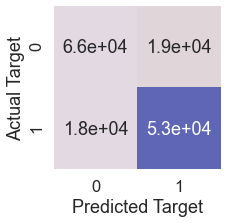

In [8]:
# Define a function to create a nicer looking confusion matrix
sns.set(font_scale=1.5)
def plot_confusion_matrix(y_test,y_pred):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, cmap="twilight_r")
    plt.xlabel("Predicted Target")
    plt.ylabel("Actual Target")
plot_confusion_matrix(y_test, prediction1)

In [9]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, prediction1)

# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, prediction1))

Accuracy Score : 0.7621132982566057
Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78     85467
         1.0       0.73      0.75      0.74     70952

    accuracy                           0.76    156419
   macro avg       0.76      0.76      0.76    156419
weighted avg       0.76      0.76      0.76    156419



In [10]:
from joblib import dump, load

# Save the model
dump(model1, 'model1.joblib')

['model1.joblib']

In [11]:
# Load the model
model1 = load('model1.joblib')

# Predict probability
pred_prob1 = model1.predict_proba(X_test)
prediction1 = model1.predict(X_test)

## Model 2: Easy Ensemble AdaBoost Classifier

In [11]:
# from imblearn.ensemble import EasyEnsembleClassifier

# # Create a an easy ensemble classifier.
# model2 = EasyEnsembleClassifier(n_estimators=100, random_state=1)

# # Fit the model
# model2 =model2.fit(X_train, y_train)

# # Predict probability
# pred_prob2 = model2.predict_proba(X_test)
# prediction2 = model2.predict(X_test)

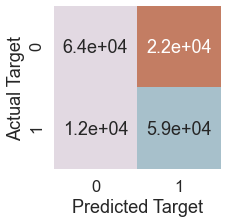

In [34]:
# # Create the confusion matrix 
# plot_confusion_matrix(y_test, prediction2)

In [35]:
# # Calculate the balanced accuracy score
# bac_score = balanced_accuracy_score(y_test, prediction2)

# # Print the imbalanced classification report
# print("Classification Report")
# print(classification_report_imbalanced(y_test, prediction2))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.84      0.74      0.83      0.79      0.78      0.61     85467
        1.0       0.73      0.83      0.74      0.77      0.78      0.62     70952

avg / total       0.79      0.78      0.79      0.78      0.78      0.61    156419



In [36]:
# # Save the model 
# dump(model2, 'model2.joblib')

['model2.joblib']

In [33]:
# Load the model
model2 = load('model2.joblib')

# Predict probability
pred_prob2 = model2.predict_proba(X_test)
prediction2 = model2.predict(X_test)

## Model 3: Decision Trees

In [12]:
# from sklearn import tree

# # Creating the decision tree classifier instance.
# model3 = tree.DecisionTreeClassifier()

# # Fit the model.
# model3 = model3.fit(X_train, y_train)

# # Predict probability
# pred_prob3 = model3.predict_proba(X_test)
# prediction3 = model3.predict(X_test)

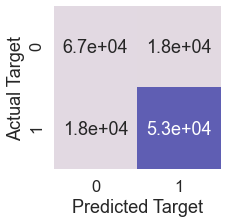

In [13]:
# Create the confusion matrix 
plot_confusion_matrix(y_test, prediction3)

In [14]:
# # Calculating the accuracy score.
# acc_score = accuracy_score(y_test, prediction3)

# # Displaying results
# print(f"Accuracy Score : {acc_score}")
# print("Classification Report")
# print(classification_report(y_test, prediction3))

Accuracy Score : 0.770622494709722
Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79     85467
         1.0       0.75      0.75      0.75     70952

    accuracy                           0.77    156419
   macro avg       0.77      0.77      0.77    156419
weighted avg       0.77      0.77      0.77    156419



In [15]:
# # Save the model
# dump(model3, 'model3.joblib')

['model3.joblib']

In [16]:
# Load the model
model3 = load('model3.joblib')

# Predict probability
pred_prob3 = model3.predict_proba(X_test)
prediction3 = model3.predict(X_test)

## Model 4: Random Forest

In [17]:
# from sklearn.ensemble import RandomForestClassifier

# # Create a random forest classifier.
# model4 = RandomForestClassifier(n_estimators=128, random_state=78)

# # Fit the model
# model4 =model4.fit(X_train, y_train)

# # predict probability
# pred_prob4 = model4.predict_proba(X_test)
# prediction4 = model4.predict(X_test)

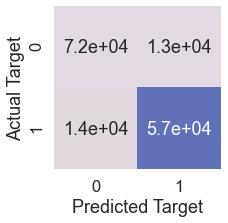

In [18]:
# # Create the confusion matrix 
# plot_confusion_matrix(y_test, prediction4)

In [19]:
# # Calculating the accuracy score.
# acc_score = accuracy_score(y_test, prediction4)

# # Displaying results
# print(f"Accuracy Score : {acc_score}")
# print("Classification Report")
# print(classification_report(y_test, prediction4))

Accuracy Score : 0.8251555117984388
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     85467
         1.0       0.81      0.80      0.81     70952

    accuracy                           0.83    156419
   macro avg       0.82      0.82      0.82    156419
weighted avg       0.83      0.83      0.83    156419



In [20]:
# # Save the model
# dump(model4, 'model4.joblib')

['model4.joblib']

In [21]:
# Load the model
model4 = load('model4.joblib')

# Predict probability
pred_prob4 = model4.predict_proba(X_test)
prediction4 = model4.predict(X_test)

In [22]:
# Calculate feature importance in the Random Forest model.
importances = model4.feature_importances_
importances

array([5.05285235e-02, 4.32807491e-03, 2.20521197e-02, 4.55406764e-03,
       9.63406057e-02, 1.38697029e-01, 2.54845471e-02, 4.18588705e-02,
       4.86614717e-02, 5.60656180e-02, 5.62517142e-03, 4.10042278e-02,
       6.61832543e-02, 3.64820983e-02, 3.99367508e-02, 4.01389045e-02,
       3.99132371e-02, 8.22793338e-02, 1.56999118e-01, 1.78322477e-05,
       1.55509872e-06, 5.71290805e-06, 2.36633415e-06, 3.95773012e-04,
       1.38980989e-03, 2.63011703e-07, 5.26785789e-06, 1.36939385e-06,
       1.04702690e-03])

In [23]:
# Sort the features by their importance.
sorted(zip(model4.feature_importances_, X.columns), reverse=True)

[(0.15699911810565703, 'Year'),
 (0.1386970285043514, 'artist_popularity'),
 (0.09634060572512912, 'followers'),
 (0.0822793337857757, 'artist_frequency'),
 (0.06618325425731485, 'acousticness'),
 (0.05606561804383842, 'loudness'),
 (0.05052852354732077, 'duration_ms'),
 (0.0486614716858553, 'energy'),
 (0.041858870463724066, 'danceability'),
 (0.041004227786380944, 'speechiness'),
 (0.04013890447991684, 'valence'),
 (0.0399367508134231, 'liveness'),
 (0.039913237072897796, 'tempo'),
 (0.03648209827535339, 'instrumentalness'),
 (0.025484547096622737, 'unique_playlists'),
 (0.022052119733533843, 'key'),
 (0.005625171421006761, 'mode'),
 (0.00455406763818066, 'time_signature'),
 (0.004328074909234382, 'explicit'),
 (0.0013898098936876763, 'genres_hoerspiel'),
 (0.001047026896677569, 'genres_other'),
 (0.0003957730120454269, 'genres_filmi'),
 (1.783224771781693e-05, 'genres_classic bollywood'),
 (5.712908050656121e-06, 'genres_classical'),
 (5.26785788699317e-06, 'genres_tango'),
 (2.3663

In [24]:
# Format the values in 2 decimals 
pd.set_option('display.float_format', "{:.2f}".format)

In [29]:
# Create a dataframe and sort the values in descending order
feature_importance_df = pd.DataFrame({"features": X.columns, "feature_importance": model4.feature_importances_})
feature_importance_df = feature_importance_df.sort_values("feature_importance", ascending=False).reset_index(drop=True)
feature_importance_df.head(30)

,features,feature_importance
0,Year,0.16
1,artist_popularity,0.14
2,followers,0.10
3,artist_frequency,0.08
4,acousticness,0.07
5,loudness,0.06
6,duration_ms,0.05
7,energy,0.05
8,danceability,0.04
9,speechiness,0.04


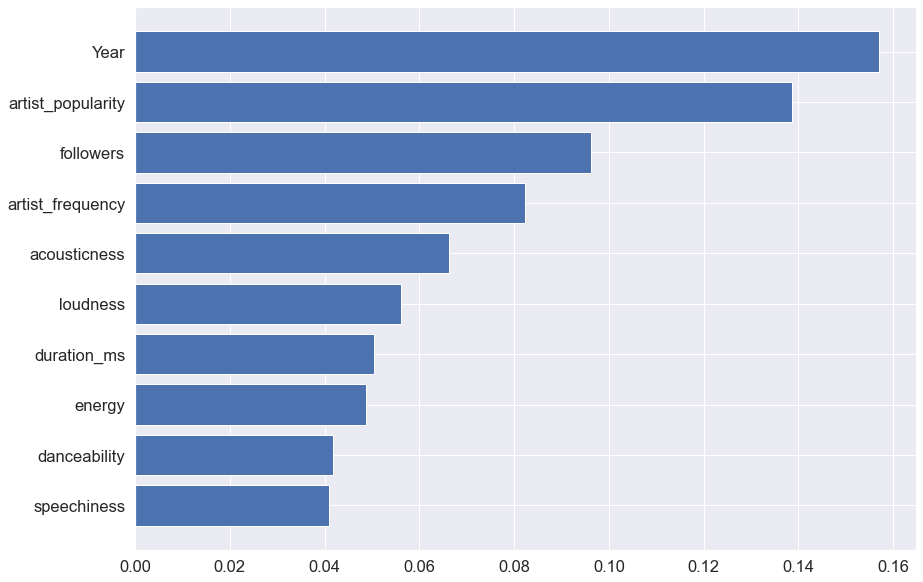

In [30]:
# Plot the dataframe for the first ten observations
fig,ax = plt.subplots(figsize=(14,10)) 
ax.barh(feature_importance_df['features'][:10],
       feature_importance_df['feature_importance'][:10])
ax.invert_yaxis()

## Feature Selection Method

### Sequential Feature Selection
Sequential Feature Selection [sfs] (SFS) is available in the SequentialFeatureSelector transformer. SFS can be either forward or backward:

Forward-SFS is a greedy procedure that iteratively finds the best new feature to add to the set of selected features. Concretely, we initially start with zero feature and find the one feature that maximizes a cross-validated score when an estimator is trained on this single feature. Once that first feature is selected, we repeat the procedure by adding a new feature to the set of selected features. The procedure stops when the desired number of selected features is reached, as determined by the n_features_to_select parameter.

Backward-SFS follows the same idea but works in the opposite direction: instead of starting with no feature and greedily adding features, we start with all the features and greedily remove features from the set. The direction parameter controls whether forward or backward SFS is used.

In general, forward and backward selection do not yield equivalent results. Also, one may be much faster than the other depending on the requested number of selected features: if we have 10 features and ask for 7 selected features, forward selection would need to perform 7 iterations while backward selection would only need to perform 3.

SFS differs from RFE and SelectFromModel in that it does not require the underlying model to expose a coef_ or feature_importances_ attribute. It may however be slower considering that more models need to be evaluated, compared to the other approaches. For example in backward selection, the iteration going from m features to m - 1 features using k-fold cross-validation requires fitting m * k models, while RFE would require only a single fit, and SelectFromModel always just does a single fit and requires no iterations.

In [31]:
# from sklearn.feature_selection import SequentialFeatureSelector
# # from sklearn.linear_model import LogisticRegression
# from time import time

# # Remove track_popularity target from features data
# y = tracks_df.track_popularity
# X = tracks_df.drop(columns=["track_popularity"])

# # Create a Logistic Regression  classifier.
# tic_bwd = time()
# LR = LogisticRegression(solver="lbfgs",max_iter=1000)
# sfs = SequentialFeatureSelector(LR, n_features_to_select=15, direction='backward')
# sfs.fit(X, y)
# sfs.get_support()
# X_new = sfs.transform(X)
# print(X_new.shape)

In [32]:
# # Split training/test datasets
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=42)

In [33]:
# from sklearn.ensemble import RandomForestClassifier

# # Create a random forest classifier.
# RF_model = RandomForestClassifier(n_estimators=128, random_state=78)

# # Fit the model
# RF_model =RF_model.fit(X_train, y_train)

# # predict probability
# pred_prob_RF = RF_model.predict_proba(X_test)
# prediction_RF = RF_model.predict(X_test)

In [34]:
# # Create the confusion matrix 
# plot_confusion_matrix(y_test, prediction_RF)

In [35]:
# # Calculating the accuracy score.
# acc_score = accuracy_score(y_test, prediction_RF)

# # Displaying results
# print(f"Accuracy Score : {acc_score}")
# print("Classification Report")
# print(classification_report(y_test, prediction_RF))

We tried to reduce the number of features using the sequential feature selection and for this purpose, we performed two classifiers logistic Regression and Random Forest. However, due to the large dataset and the limited time of the project, we were not able to achieve the desired result.  

## Drop 5 features with the least importance

In [27]:
# Drop the 5 columns with low rank
tracks_dropped_df = tracks_df.drop(['genres_classical era', 'genres_classical', 'genres_sufi'
                                   , 'genres_vintage tango', 'genres_tango'], axis='columns')
tracks_dropped_df.head()

,track_popularity,duration_ms,explicit,key,time_signature,followers,artist_popularity,unique_playlists,danceability,energy,...,liveness,valence,tempo,artist_frequency,Year,genres_classic bollywood,genres_desi pop,genres_filmi,genres_hoerspiel,genres_other
0,1.00,0.05,0.00,0.55,0.80,0.00,0.36,0.00,0.63,0.60,...,0.07,0.38,0.57,0.00,0.93,0.00,0.00,0.00,0.00,1.00
1,1.00,0.03,0.00,0.18,0.80,0.00,0.48,0.00,0.63,0.77,...,0.11,0.55,0.39,0.00,0.87,0.00,0.00,0.00,0.00,1.00
2,0.00,0.04,0.00,0.64,0.80,0.00,0.38,0.00,0.58,0.61,...,0.34,0.56,0.43,0.01,0.64,0.00,0.00,0.00,0.00,1.00
3,1.00,0.03,0.00,0.18,0.80,0.01,0.73,0.00,0.26,0.90,...,0.08,0.56,0.78,0.03,0.64,0.00,0.00,0.00,0.00,1.00
4,1.00,0.04,0.00,0.36,0.60,0.00,0.44,0.00,0.62,0.52,...,0.10,0.31,0.58,0.00,0.88,0.00,0.00,0.00,0.00,1.00


In [28]:
# Remove loan status target from features data
y = tracks_dropped_df.track_popularity
X = tracks_dropped_df.drop(columns=["track_popularity"])

# Split training/test datasets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=42)

In [38]:
# from sklearn.ensemble import RandomForestClassifier

# # Create a random forest classifier.
# model5 = RandomForestClassifier(n_estimators=128, random_state=78)

# # Fit the model
# model5 =model5.fit(X_train1,y_train1)

# # Predict probability
# pred_prob5 = model5.predict_proba(X_test1)
# prediction5 = model5.predict(X_test1)

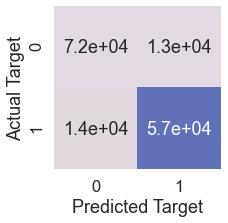

In [30]:
# # Create the confusion matrix 
# plot_confusion_matrix(y_test1, prediction5)

In [31]:
# # Calculating the accuracy score.
# acc_score = accuracy_score(y_test1, prediction5)

# # Displaying results
# print(f"Accuracy Score : {acc_score}")
# print("Classification Report")
# print(classification_report(y_test1, prediction5))

Accuracy Score : 0.8260313644761825
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84     85467
         1.0       0.81      0.80      0.81     70952

    accuracy                           0.83    156419
   macro avg       0.82      0.82      0.82    156419
weighted avg       0.83      0.83      0.83    156419



In [32]:
# # Save the model
# dump(model5, 'model5.joblib')

['model5.joblib']

In [29]:
# Load the model
model5 = load('model5.joblib')

# Predict probability
pred_prob5 = model5.predict_proba(X_test1)
prediction5 = model5.predict(X_test1)

By droping 5 columns from the family of genres, the accuracy score of the model has not changed significantly. Therefore, it is preferable to keep all the features.    

## Models Evaluation 

From the numerous ways to evaluate the performance of a classifier, we use the difference between two popular performance reporting methods: Precision-Recall (PR) Curve and Receiver Operating Characteristic (ROC) Curve.

### Precision-Recall (PR) Curve: 
A PR curve is simply a graph with Precision values on the y-axis and Recall values on the x-axis. In other words, the PR curve contains TP/(TP+FN) on the y-axis and TP/(TP+FP) on the x-axis. It is desired that the algorithm should have both high precision, and high recall. However, most machine learning algorithms often involve a trade-off between the two. A good PR curve has greater AUC (area under curve).

## Precision-Recall curve  

In [43]:
from sklearn.metrics import average_precision_score

# Compute average precision from prediction scores for each model
average_precision1 = average_precision_score(y_test, prediction1)
average_precision2 = average_precision_score(y_test, prediction2)
average_precision3 = average_precision_score(y_test, prediction3)
average_precision4 = average_precision_score(y_test, prediction4)
average_precision5 = average_precision_score(y_test1, prediction5)

# Print the average precision for each model
print('Average precision score Logistic Regression: {0:0.2f}'.format(average_precision1))
print('Average precision score Easy Ensemble AdaBoost: {0:0.2f}'.format(average_precision2))
print('Average precision score Decision Trees: {0:0.2f}'.format(average_precision3))
print('Average precision score Random Forest: {0:0.2f}'.format(average_precision4))
print('Average precision score Random Forest Using Feature Selection : {0:0.2f}'.format(average_precision5))

Average precision score Logistic Regression: 0.66
Average precision score Easy Ensemble AdaBoost: 0.68
Average precision score Decision Trees: 0.67
Average precision score Random Forest: 0.74
Average precision score Random Forest Using Feature Selection : 0.74


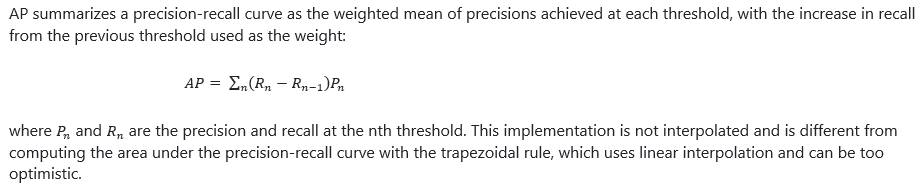

Text(0.5, 1.0, 'Precision-Recall curve')

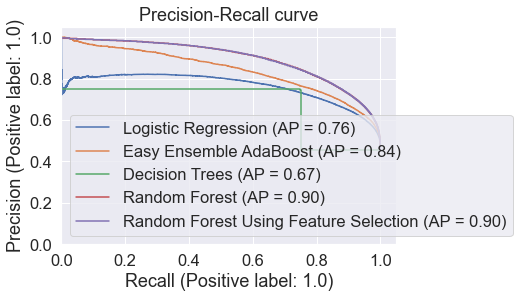

In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

# Plot precision-recall pairs for different probability thresholds of each model
plot_precision_recall_curve(model1, X_test, y_test, ax = plt.gca(),name = "Logistic Regression")
plot_precision_recall_curve(model2, X_test, y_test, ax = plt.gca(),name = "Easy Ensemble AdaBoost")
plot_precision_recall_curve(model3, X_test, y_test, ax = plt.gca(),name = "Decision Trees")
plot_precision_recall_curve(model4, X_test, y_test, ax = plt.gca(),name = "Random Forest")
plot_precision_recall_curve(model5, X_test1, y_test1, ax = plt.gca(),name = "Random Forest Using Feature Selection")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall curve')

In fact, a model with perfect skill is depicted as a point at a coordinate of (1,1). A skillful model is represented by a curve that bows towards a coordinate of (1,1). A no-skill classifier will be a horizontal line on the plot with a precision that is proportional to the number of positive examples in the dataset. Therefore, the last two classifiers selected from the Random Forest family, the first by keeping the features and the second by dropping some of the least importance are closer to the ideal model. 

### Receiver Operating Characteristic (ROC) Curve:
Receiver operating characteristic(ROC) curve is created by plotting the true positive rate (TPR) on y-axis against the false positive rate (FPR) on x-axis at various threshold settings. 
Area under the ROC Curve (AUC) measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).
AUC-score is always between 0 and 1.
AUC-score gives accuracy of the proposed model.
The top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

In [45]:
from sklearn.metrics import roc_curve

# ROC curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2,tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test1, pred_prob5[:,1], pos_label=1)

In [46]:
# ROC curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [47]:
from sklearn.metrics import roc_auc_score

# AUC scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test1, pred_prob5[:,1])

# Print the AUC score for each model
print('AUC score Logistic Regression: {0:0.2f}'.format(auc_score1))
print('AUC score Easy Ensemble AdaBoost: {0:0.2f}'.format(auc_score2))
print('AUC score Decision Trees: {0:0.2f}'.format(auc_score3))
print('AUC score Random Forest: {0:0.2f}'.format(auc_score4))
print('AUC score Random Forest Using Feature Selection: {0:0.2f}'.format(auc_score5))


AUC score Logistic Regression: 0.84
AUC score Easy Ensemble AdaBoost: 0.87
AUC score Decision Trees: 0.77
AUC score Random Forest: 0.91
AUC score Random Forest Using Feature Selection: 0.91


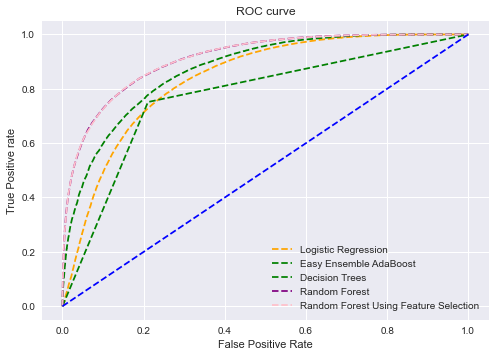

In [48]:
# Plot the roc curves for the all the models using matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Easy Ensemble AdaBoost')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='Decision Trees')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='Random Forest')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='Random Forest Using Feature Selection')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Results
It is evident from the plot that the AUC for the Random Forest and Random Forest Using Feature Selection ROC curves are higher than that for other ROC curves. Therefore, we can say that Random Forest did a better job of classifying the positive class in the dataset. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. It is important to note that the classifier that has a higher AUC on the ROC curve will always have a higher AUC on the PR curve as well.

## K-Fold Cross Validation

In [49]:
# Import required library
from sklearn.model_selection import KFold 
from sklearn.metrics import roc_curve
import statistics as st

In [58]:
k = 10
kf = KFold(n_splits=k, random_state=None)

# Train the model
model = LogisticRegression(solver= 'liblinear')

# Create the lists
acc_score = []
pred_prob_list = []
prediction_list = []
fpr_list = []
tpr_list = []
thresh_list = []
auc_scores = []
 
for train_index , test_index in kf.split(X):    
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    # Fit the model
    model = model.fit(X_train,y_train)
         
    # Predict probability
    pred_prob = model.predict_proba(X_test)
    prediction = model.predict(X_test)
    
        
    # Calculating the accuracy score.
    acc = accuracy_score(y_test, prediction)
    acc_score.append(acc)
    
        
    # Displaying results
    print("Classification Report:")
    print(classification_report(y_test, prediction))
    
    # Add the probability and prediction to the list
    pred_prob_list.append(pred_prob)
    prediction_list.append(prediction)
    
    # ROC curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    
    # Add fpr, tpr and thresh in the lists
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    thresh_list.append(thresh)
    
    # AUC scores
    auc_score = roc_auc_score(y_test, pred_prob[:,1])
    auc_scores.append(auc_score)
    print(f"auc_score: {auc_score}")
    
# Calculate the median and average accuracy score
avg_acc_score = sum(acc_score)/k
print(f"Median Accuracy Score : {st.median(acc_score)}")
print(f"Average Accuracy Score : {avg_acc_score}")  

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80     35669
         1.0       0.73      0.74      0.74     26899

    accuracy                           0.77     62568
   macro avg       0.77      0.77      0.77     62568
weighted avg       0.77      0.77      0.77     62568

auc_score: 0.8495663579898065
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79     34754
         1.0       0.73      0.74      0.74     27814

    accuracy                           0.77     62568
   macro avg       0.76      0.76      0.76     62568
weighted avg       0.77      0.77      0.77     62568

auc_score: 0.8439209411458046
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79     34459
         1.0       0.74      0.74      0.74     28109

    accuracy                           0.76     62568

In [59]:
# Save the model
dump(model, 'model.joblib')

['model.joblib']

In [60]:
# Load the model
model = load('model.joblib')

In [61]:
# ROC curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

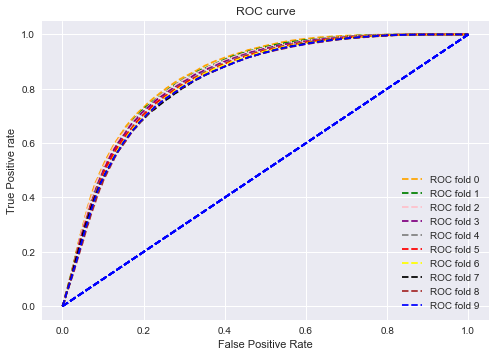

In [62]:
# Plot the roc curves for the all the models using matplotlib
plt.style.use('seaborn')

color = ['orange', 'green', 'pink', 'purple', 'gray', 'red', 'yellow', 'black', 'brown', 'blue']

for i in range(len(fpr_list)):
    # plot roc curves
    plt.plot(fpr_list[i], tpr_list[i], linestyle='--',color=color[i], label='ROC fold {}'.format(i))
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

The accuracy score obtained in each fold  indicates that the overfitting phenomenon has not happened on the model 
and the model works properly through all the folds.
